In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\RABIN RESIN\\Desktop\\luminar\\development-journey\\mechine learning journey\\pandas-works\\customer_behaviour\\E-commerce Customer Behavior - Sheet1.csv")
df.shape



(350, 11)

In [2]:
df.columns


Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [3]:

df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:

df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [5]:
# changing column names using rename
df.rename(columns={"Customer ID":"custmer_id","Gender":"gender","Age":"age","City":"city","Membership Type":"membership_type","Total Spend":"total_spend","Items Purchased":"item_purchased","Average Rating":"average_rating","Discount Applied":"discount_applied","Days Since Last Purchase":"days_since_last_purchase","Satisfaction Level":"satisfication_level"},inplace=True)
df.isnull().sum()

custmer_id                  0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
item_purchased              0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfication_level         2
dtype: int64

In [6]:
df["satisfication_level"].fillna(df["average_rating"].apply(lambda x:"unsatisfied" if x<=4.0 else "neutral" if x>4.0 and x<4.5 else "satisfied"),inplace=True)

C:\Users\RABIN RESIN\AppData\Local\Temp\ipykernel_6920\514570337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["satisfication_level"].fillna(df["average_rating"].apply(lambda x:"unsatisfied" if x<=4.0 else "neutral" if x>4.0 and x<4.5 else "satisfied"),inplace=True)


In [7]:
df.isnull().sum()

custmer_id                  0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
item_purchased              0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfication_level         0
dtype: int64

In [8]:
gender=df["gender"].value_counts()
gender

gender
Female    175
Male      175
Name: count, dtype: int64

Text(0, 0.5, 'count')

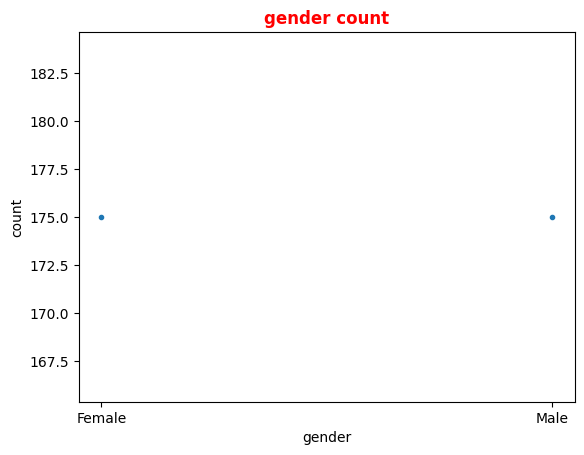

In [9]:
import matplotlib.pyplot as plt
plt.plot(gender,marker=".",linestyle="None")
plt.title("gender count",color="red",weight="bold")
plt.xlabel("gender")
plt.ylabel("count")

In [10]:
# customer average age
round(df["age"].mean())


34

In [11]:
# unique membership
df["membership_type"].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [12]:
# membership wise count
membership=df["membership_type"].value_counts()
membership


membership_type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64

Text(0, 0.5, 'count')

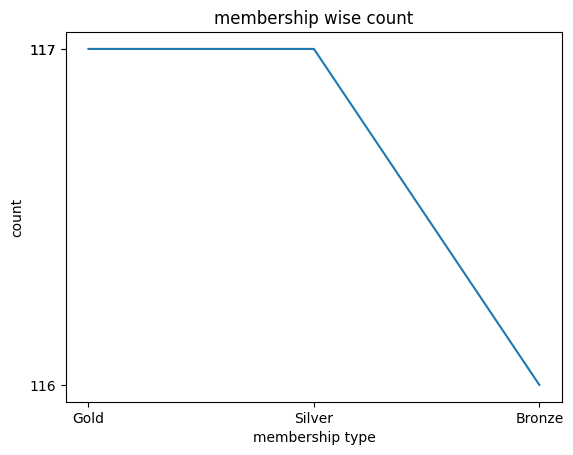

In [13]:
plt.yticks(membership.values)
plt.plot(membership)
plt.title("membership wise count")
plt.xlabel("membership type")
plt.ylabel("count")

In [14]:
# membership wise total spend sum
total=df.groupby("membership_type")["total_spend"].sum()
total

membership_type
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: total_spend, dtype: float64

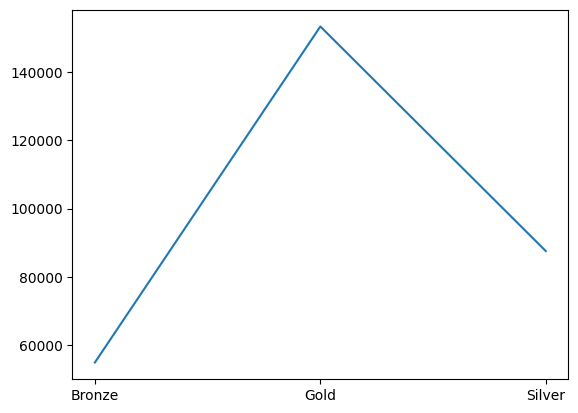

In [15]:
plt.plot(total)

Text(0, 0.5, 'count')

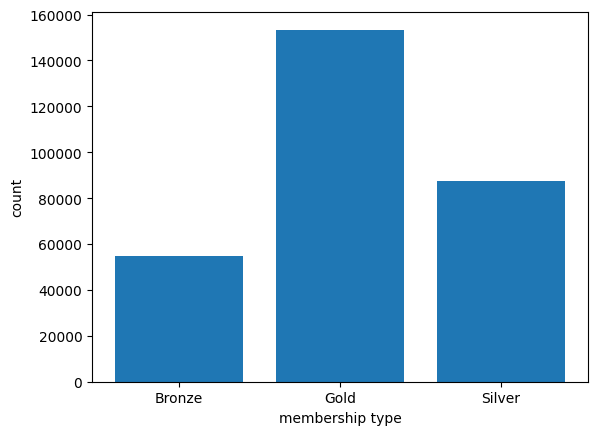

In [16]:
plt.bar(total.index,total.values)
plt.xlabel("membership type")
plt.ylabel("count")

In [17]:
# gold members details
df[df["membership_type"]=="Gold"]

,custmer_id,gender,age,city,membership_type,total_spend,item_purchased,average_rating,discount_applied,days_since_last_purchase,satisfication_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,Satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,Satisfied


In [18]:
# rating above 4.5
df[df["average_rating"]>4.5]

,custmer_id,gender,age,city,membership_type,total_spend,item_purchased,average_rating,discount_applied,days_since_last_purchase,satisfication_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
15,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,Satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
326,427,Male,30,San Francisco,Gold,1450.5,19,4.6,False,14,Satisfied
332,433,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,Satisfied
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied


In [19]:
# customer per city plot
customer_per_city=df["city"].value_counts()
customer_per_city

city
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

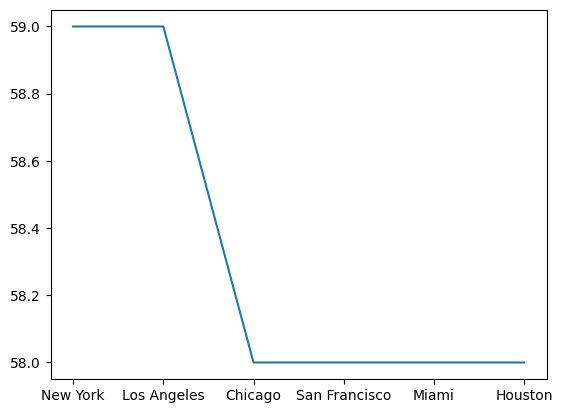

In [20]:
plt.plot(customer_per_city)

<BarContainer object of 6 artists>

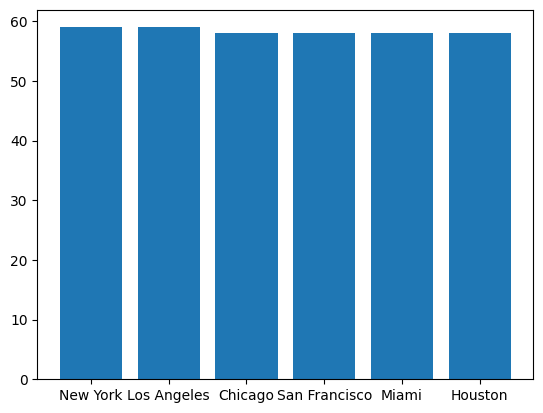

In [21]:
plt.bar(customer_per_city.index,customer_per_city.values)

In [22]:
# city wise total spend plot
city_wise_total_spend=df.groupby("city")["total_spend"].sum()
city_wise_total_spend

city
Chicago          28993.2
Houston          25919.9
Los Angeles      47524.0
Miami            40042.6
New York         68737.1
San Francisco    84666.8
Name: total_spend, dtype: float64

<BarContainer object of 6 artists>

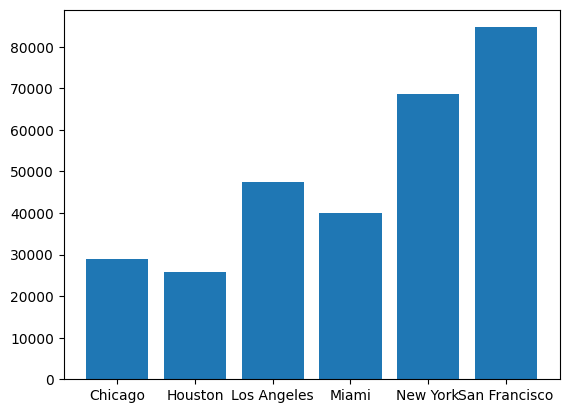

In [23]:
plt.bar(city_wise_total_spend.index,city_wise_total_spend.values)

([<matplotlib.patches.Wedge at 0x24465342ba0>,
 [Text(1.0482892953801437, 0.3333009948851073, 'Chicago'),
  Text(0.6915931686830732, 0.8553939963729618, 'Houston'),
  Text(-0.10970201354560376, 1.094516088609044, 'Los Angeles'),
  Text(-0.9428293511093423, 0.5666328746964271, 'Miami'),
  Text(-0.8991876248554197, -0.633609986748054, 'New York'),
  Text(0.684663489670123, -0.860950582735577, 'San Francisco')],
 [Text(0.5717941611164419, 0.18180054266460394, '9.8%'),
  Text(0.3772326374634944, 0.4665785434761609, '8.8%'),
  Text(-0.05983746193396568, 0.5970087756049329, '16.1%'),
  Text(-0.5142705551505503, 0.309072477107142, '13.5%'),
  Text(-0.49046597719386525, -0.34560544731712034, '23.2%'),
  Text(0.3734528125473398, -0.4696094087648601, '28.6%')])

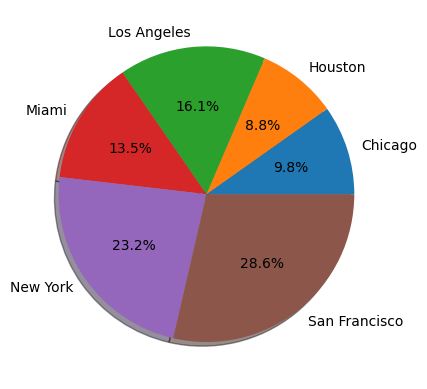

In [24]:
plt.pie(city_wise_total_spend.values,labels=city_wise_total_spend.index,autopct="%1.1f%%",shadow=True)

In [25]:
# city wise average rating
city_wise_avg_rating=df.groupby("city")["average_rating"].mean()
city_wise_avg_rating

city
Chicago          3.456897
Houston          3.193103
Los Angeles      4.172881
Miami            3.927586
New York         4.544068
San Francisco    4.808621
Name: average_rating, dtype: float64

<BarContainer object of 6 artists>

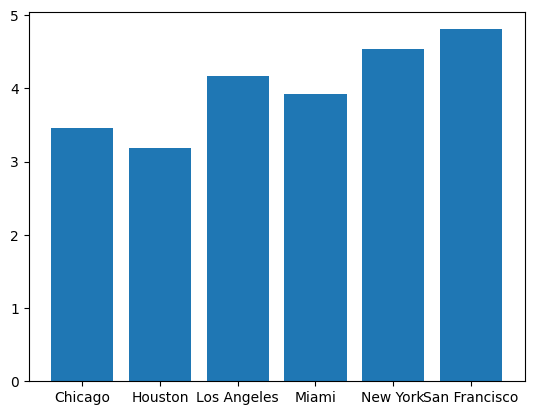

In [26]:
plt.bar(city_wise_avg_rating.index,city_wise_avg_rating.values)

In [27]:
age_total_spend=df.groupby("age")["total_spend"].mean()
age_total_spend

age
26     689.488889
27     710.820000
28    1492.183333
29    1290.218182
30    1325.645833
31    1144.600000
32     805.451515
33     820.640000
34     791.045833
35     800.088000
36     500.912000
37     432.050000
38     444.233333
41     484.416667
42     518.716667
43     507.950000
Name: total_spend, dtype: float64

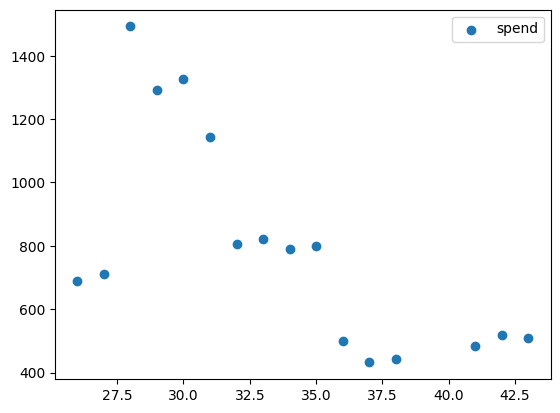

In [28]:
plt.scatter(age_total_spend.index,age_total_spend.values,label="spend")
plt.legend()

(array([ 69., 106.,  84.,  33.,  58.]),
 array([26. , 29.4, 32.8, 36.2, 39.6, 43. ]),
 <BarContainer object of 5 artists>)

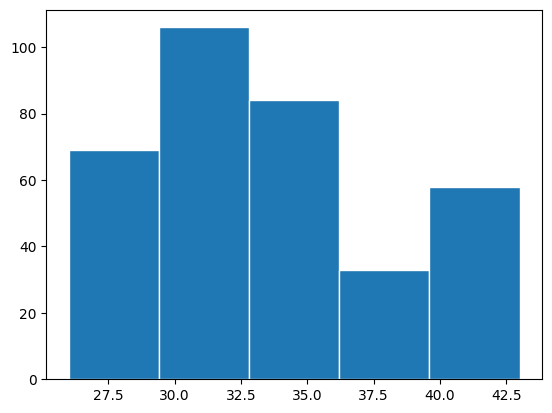

In [30]:
plt.hist(df["age"],bins=5,edgecolor="white")